# Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

from sklearn.metrics import r2_score

# Read Data

In [2]:
X_test = pd.read_csv('Data/X_test.csv', header=None)
Y_test = pd.read_csv('Data/Y_test_std.csv', header=None)
Y_test_21 = pd.read_csv('Data/Y_test_std_21.csv', header=None)

In [3]:
MGP_21_result = pd.read_csv('Result/L.MGP_21_result.csv')
MVGP_21_result = pd.read_csv('Result/MVGP_21_result.csv')

# Compare

In [4]:
MVGP_21_result['estimated_params_list'] = MVGP_21_result['estimated_params'].apply(ast.literal_eval)

MVGP_2d = np.array(MVGP_21_result['estimated_params_list'].tolist())

MGP_21_result['estimated_params_list'] = MGP_21_result['estimated_params'].apply(ast.literal_eval)

MGP_2d = np.array(MGP_21_result['estimated_params_list'].tolist())

In [5]:
r2_score(MVGP_2d, X_test.values)

0.9959429736508951

In [20]:
r2_score(np.array(MVGP_21_result['test_preds'].apply(ast.literal_eval).tolist()).reshape(-1, 21), Y_test_21.values)

0.9903116664805248

In [19]:
np.mean((MVGP_2d - X_test.values) ** 2)

0.00795599330985989

In [16]:
np.mean((np.array(MVGP_21_result['test_preds'].apply(ast.literal_eval).tolist()).reshape(-1, 21) - Y_test_21.values) ** 2)

0.0006432625970260701

In [ ]:
r2_score(MGP_2d, X_test.values)

0.9470818441128672

In [21]:
r2_score(np.array(MGP_21_result['test_preds'].apply(ast.literal_eval).tolist()).reshape(-1, 21), Y_test_21.values)

0.9682323467924154

In [18]:
np.mean((MGP_2d - X_test.values) ** 2)

0.0852693068882293

In [17]:
np.mean((np.array(MGP_21_result['test_preds'].apply(ast.literal_eval).tolist()).reshape(-1, 21) - Y_test_21.values) ** 2)

0.009779575101043598

C:\Users\r4718\AppData\Local\Temp\ipykernel_20796\687845748.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(abs_errors,


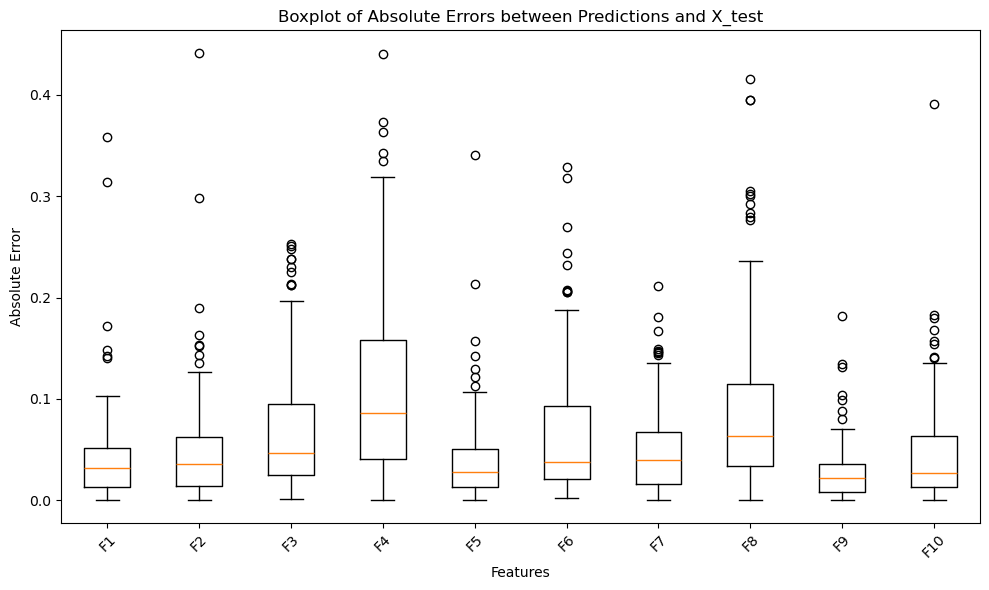

In [9]:
errors = MVGP_2d - X_test.values
abs_errors = np.abs(errors)


plt.figure(figsize=(10, 6))

plt.boxplot(abs_errors,
            labels=[f'F{i+1}' for i in range(abs_errors.shape[1])],
            showfliers=True)

plt.xlabel('Features')
plt.ylabel('Absolute Error')
plt.title('Boxplot of Absolute Errors between Predictions and X_test')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()